<a href="https://colab.research.google.com/github/Gilberto-Gonzalez/uruqai-multirisk-logistics-platform/blob/main/Cleaned_Dataset_Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Read files and skip the first 4 rows that contain introductory text
try:
    df = pd.read_csv('/content/SSNMX_catalogo_20151013_20251013.csv', sep=',', skiprows=4)
except:
    try:
        df = pd.read_csv('/content/SSNMX_catalogo_20151013_20251013.csv', sep=';', skiprows=4)
    except:
        try:
            df = pd.read_csv('/content/SSNMX_catalogo_20151013_20251013.csv', sep='\t', skiprows=4)
        except:
            print("Could not read the CSV with comma, semicolon, or tab delimiters.")

/tmp/ipython-input-860941977.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/SSNMX_catalogo_20151013_20251013.csv', sep=',', skiprows=4)


In [ ]:
#Show first 40 rows of the current dataset
display(df.head(n=40))

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,2015-10-13,00:31:17,3.5,14.5017,-92.1347,78.3,"20 km al SUR de CD HIDALGO, CHIS",2015-10-13,05:31:17,revisado
1,2015-10-13,00:43:31,3.5,16.3595,-98.4713,20.0,"36 km al SUR de OMETEPEC, GRO",2015-10-13,05:43:31,revisado
2,2015-10-13,00:44:08,3.6,17.6878,-95.8163,100.9,"47 km al SUR de LOMA BONITA, OAX",2015-10-13,05:44:08,revisado
3,2015-10-13,00:57:44,3.7,16.0148,-92.9205,155.0,"44 km al SURESTE de VILLAFLORES, CHIS",2015-10-13,05:57:44,revisado
4,2015-10-13,01:20:37,3.7,16.2372,-98.1022,9.8,"13 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:20:37,revisado
5,2015-10-13,01:21:49,3.8,15.6138,-93.2580,94.1,"10 km al SUROESTE de PIJIJIAPAN, CHIS",2015-10-13,06:21:49,revisado
6,2015-10-13,01:49:54,3.5,15.8310,-98.7627,10.4,"95 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:49:54,revisado
7,2015-10-13,02:19:40,3.7,15.1223,-92.1433,5.0,"15 km al NORTE de CACAHOATAN, CHIS",2015-10-13,07:19:40,revisado
8,2015-10-13,02:38:45,3.7,16.1168,-96.4857,16.1,"26 km al SURESTE de MIAHUATLAN, OAX",2015-10-13,07:38:45,revisado
9,2015-10-13,02:42:00,3.4,16.2763,-98.2252,15.4,"20 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,07:42:00,revisado


In [ ]:
#Shape of data (rows and columns)
df.shape

(278200, 10)

**DATA CLEANING**



In [ ]:
df_clean = df.iloc[4:-7]

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
df_clean.drop_duplicates(inplace=True)

/tmp/ipython-input-2294670995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(inplace=True)


In [ ]:
display(df_clean.head(n=10))

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
4,2015-10-13,01:20:37,3.7,16.2372,-98.1022,9.8,"13 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:20:37,revisado
5,2015-10-13,01:21:49,3.8,15.6138,-93.2580,94.1,"10 km al SUROESTE de PIJIJIAPAN, CHIS",2015-10-13,06:21:49,revisado
6,2015-10-13,01:49:54,3.5,15.8310,-98.7627,10.4,"95 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:49:54,revisado
7,2015-10-13,02:19:40,3.7,15.1223,-92.1433,5.0,"15 km al NORTE de CACAHOATAN, CHIS",2015-10-13,07:19:40,revisado
8,2015-10-13,02:38:45,3.7,16.1168,-96.4857,16.1,"26 km al SURESTE de MIAHUATLAN, OAX",2015-10-13,07:38:45,revisado
9,2015-10-13,02:42:00,3.4,16.2763,-98.2252,15.4,"20 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,07:42:00,revisado
10,2015-10-13,02:58:52,3.8,16.3537,-98.7132,20.0,"49 km al SUROESTE de OMETEPEC, GRO",2015-10-13,07:58:52,revisado
11,2015-10-13,04:10:48,2.9,16.2567,-98.2195,15.1,"20 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,09:10:48,revisado
12,2015-10-13,04:38:52,2.8,15.1748,-92.1542,3.6,"21 km al NORTE de CACAHOATAN, CHIS",2015-10-13,09:38:52,revisado
13,2015-10-13,04:42:39,4.0,15.5482,-93.9680,86.9,"64 km al SUROESTE de TONALA, CHIS",2015-10-13,09:42:39,revisado


In [ ]:
import re

In [ ]:
# Clean names of columns
df_clean.columns = df.columns.str.strip().str.replace('"', '')

In [ ]:
# Make sure the column exist
if 'Referencia de localizacion' not in df_clean.columns:
    print("Error: No se encontró la columna 'Referencia de localizacion' después de limpiar los encabezados.")
    exit()

In [ ]:
#Descriptive Stats
df_clean.describe()

,Magnitud,Latitud,Longitud,Profundidad
count,278189.000000,278189.000000,278189.000000,278189.000000
mean,3.471637,18.256299,-99.797776,30.738968
std,0.519251,4.174646,6.037300,35.672059
min,0.300000,10.271000,-120.595000,0.100000
25%,3.300000,16.048700,-102.647000,10.000000
50%,3.600000,16.710800,-98.139700,16.100000
75%,3.800000,18.600000,-95.064000,36.600000
max,8.200000,38.092300,-88.696000,279.600000


In [ ]:
# Convert the 'Magnitud' column to numeric type, forcing errors to NaN
df_clean['Magnitud'] = pd.to_numeric(df_clean['Magnitud'], errors='coerce')

/tmp/ipython-input-1541852385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Magnitud'] = pd.to_numeric(df_clean['Magnitud'], errors='coerce')


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278189 entries, 4 to 278192
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Fecha                       278189 non-null  object 
 1   Hora                        278189 non-null  object 
 2   Magnitud                    278189 non-null  float64
 3   Latitud                     278189 non-null  float64
 4   Longitud                    278189 non-null  float64
 5   Profundidad                 278189 non-null  float64
 6   Referencia de localizacion  278189 non-null  object 
 7   Fecha UTC                   278189 non-null  object 
 8   Hora UTC                    278189 non-null  object 
 9   Estatus                     278189 non-null  object 
dtypes: float64(4), object(6)
memory usage: 21.2+ MB


In [ ]:
#Null values
df_clean.isnull().sum()

,0
Fecha,0
Hora,0
Magnitud,0
Latitud,0
Longitud,0
Profundidad,0
Referencia de localizacion,0
Fecha UTC,0
Hora UTC,0
Estatus,0


In [ ]:
mean_magnitude = df_clean['Magnitud'].mean()
df_clean['Magnitud'].fillna(mean_magnitude, inplace=True)

/tmp/ipython-input-3196646147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Magnitud'].fillna(mean_magnitude, inplace=True)
/tmp/ipython-input-3196646147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Magnitud'].fillna(mean_magnitude, inplace=True)


In [ ]:
df_clean.isna().sum()

,0
Fecha,0
Hora,0
Magnitud,0
Latitud,0
Longitud,0
Profundidad,0
Referencia de localizacion,0
Fecha UTC,0
Hora UTC,0
Estatus,0


In [ ]:
display(df_clean.head(n=10))

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
4,2015-10-13,01:20:37,3.7,16.2372,-98.1022,9.8,"13 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:20:37,revisado
5,2015-10-13,01:21:49,3.8,15.6138,-93.2580,94.1,"10 km al SUROESTE de PIJIJIAPAN, CHIS",2015-10-13,06:21:49,revisado
6,2015-10-13,01:49:54,3.5,15.8310,-98.7627,10.4,"95 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:49:54,revisado
7,2015-10-13,02:19:40,3.7,15.1223,-92.1433,5.0,"15 km al NORTE de CACAHOATAN, CHIS",2015-10-13,07:19:40,revisado
8,2015-10-13,02:38:45,3.7,16.1168,-96.4857,16.1,"26 km al SURESTE de MIAHUATLAN, OAX",2015-10-13,07:38:45,revisado
9,2015-10-13,02:42:00,3.4,16.2763,-98.2252,15.4,"20 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,07:42:00,revisado
10,2015-10-13,02:58:52,3.8,16.3537,-98.7132,20.0,"49 km al SUROESTE de OMETEPEC, GRO",2015-10-13,07:58:52,revisado
11,2015-10-13,04:10:48,2.9,16.2567,-98.2195,15.1,"20 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,09:10:48,revisado
12,2015-10-13,04:38:52,2.8,15.1748,-92.1542,3.6,"21 km al NORTE de CACAHOATAN, CHIS",2015-10-13,09:38:52,revisado
13,2015-10-13,04:42:39,4.0,15.5482,-93.9680,86.9,"64 km al SUROESTE de TONALA, CHIS",2015-10-13,09:42:39,revisado


**OUTLIERS**


In [ ]:
df_clean.describe()

,Magnitud,Latitud,Longitud,Profundidad,Distance (km)
count,256596.000000,256596.000000,256596.000000,256596.000000,222594.000000
mean,3.567870,18.027884,-99.402979,32.148018,45.425766
std,0.296816,4.144883,5.804558,36.422235,39.263336
min,2.800000,12.742800,-119.239000,0.500000,1.000000
25%,3.400000,16.016500,-102.125000,10.000000,18.000000
50%,3.600000,16.582200,-98.072000,16.100000,32.000000
75%,3.800000,18.157000,-95.032300,40.400000,64.000000
max,4.300000,38.092300,-88.696000,279.600000,648.000000


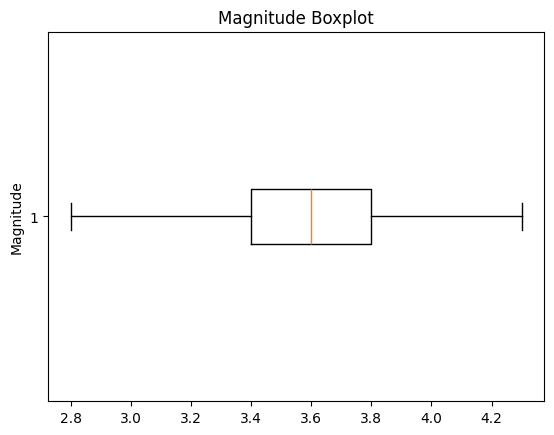

In [ ]:
plt.boxplot(df_clean['Magnitud'], vert=False)
plt.ylabel('Magnitude')
plt.title('Magnitude Boxplot')
plt.show()

In [ ]:
Q1 = df_clean['Magnitud'].quantile(0.25)
q3 = df_clean['Magnitud'].quantile(0.75)
IQR = q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", q3)
print("IQR:", IQR)

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 3.4
Q3: 3.8
IQR: 0.3999999999999999
Lower Bound: 2.8
Upper Bound: 4.3999999999999995


In [ ]:
outliers = df_clean[(df_clean['Magnitud'] < lower_bound) | (df_clean['Magnitud'] > upper_bound)]
outliers.head(n=30)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Distance (km),Cardinal Point,Federal Entity


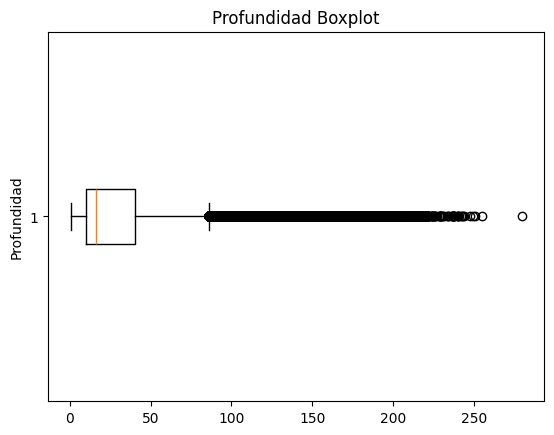

In [ ]:
plt.boxplot(df_clean['Profundidad'], vert=False)
plt.ylabel('Profundidad')
plt.title('Profundidad Boxplot')
plt.show()

In [ ]:
Q1 = df_clean['Profundidad'].quantile(0.25)
q3 = df_clean['Profundidad'].quantile(0.75)
IQR = q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", q3)
print("IQR:", IQR)

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers_max = df_clean[df_clean["Profundidad"] > upper_bound]

max_outlier = outliers_max["Profundidad"].max()
print("Max Outlier:", max_outlier)

print("Row:")
print(df_clean[df_clean['Profundidad'] == max_outlier])

Q1: 10.0
Q3: 40.4
IQR: 30.4
Lower Bound: -35.599999999999994
Upper Bound: 86.0
Max Outlier: 279.6
Row:
           Fecha      Hora  Magnitud  Latitud  Longitud  Profundidad  \
5204  2016-03-23  00:41:22       4.1  15.5518   -92.123        279.6   

                   Referencia de localizacion   Fecha UTC  Hora UTC   Estatus  \
5204  12 km al SUR de FRONTERA COMALAPA, CHIS  2016-03-23  06:41:22  revisado   

      Distance (km) Cardinal Point Federal Entity  
5204           12.0            SUR           CHIS  


In [ ]:
outliers.shape

(26750, 13)

In [ ]:
upper_limit = Q3 + 1.5 * IQR


SyntaxError: unmatched ']' (ipython-input-1849091248.py, line 2)

In [ ]:
outliers = df_clean[(df_clean['Profundidad'] < lower_bound) | (df_clean['Profundidad'] > upper_bound)]
outliers.head(n=30)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Distance (km),Cardinal Point,Federal Entity
5,2015-10-13,01:21:49,3.8,15.6138,-93.2580,94.1,"10 km al SUROESTE de PIJIJIAPAN, CHIS",2015-10-13,06:21:49,revisado,10.0,SUROESTE,CHIS
13,2015-10-13,04:42:39,4.0,15.5482,-93.9680,86.9,"64 km al SUROESTE de TONALA, CHIS",2015-10-13,09:42:39,revisado,64.0,SUROESTE,CHIS
29,2015-10-13,16:11:17,3.5,14.6850,-92.8163,92.5,"63 km al SUROESTE de HUIXTLA, CHIS",2015-10-13,21:11:17,revisado,63.0,SUROESTE,CHIS
35,2015-10-13,20:17:03,3.5,16.4303,-93.4807,146.2,"32 km al NOROESTE de VILLAFLORES, CHIS",2015-10-14,01:17:03,revisado,32.0,NOROESTE,CHIS
37,2015-10-13,20:24:43,3.5,17.5198,-94.5935,146.5,"51 km al SUR de JALTIPAN DE MORELOS, VER",2015-10-14,01:24:43,revisado,51.0,SUR,VER
41,2015-10-14,00:17:57,3.9,16.2592,-93.3995,147.7,"14 km al OESTE de VILLAFLORES, CHIS",2015-10-14,05:17:57,revisado,14.0,OESTE,CHIS
51,2015-10-14,08:01:18,3.8,16.5468,-94.7238,94.8,"14 km al NORESTE de UNION HIDALGO, OAX",2015-10-14,13:01:18,revisado,14.0,NORESTE,OAX
55,2015-10-14,12:24:18,3.8,17.7273,-95.1948,122.3,"30 km al SUROESTE de SAYULA DE ALEMAN, VER",2015-10-14,17:24:18,revisado,30.0,SUROESTE,VER
74,2015-10-15,00:46:10,3.7,16.5930,-94.4105,103.5,"47 km al NORESTE de UNION HIDALGO, OAX",2015-10-15,05:46:10,revisado,47.0,NORESTE,OAX
75,2015-10-15,00:52:21,3.6,14.4533,-92.3023,90.7,"30 km al SUROESTE de CD HIDALGO, CHIS",2015-10-15,05:52:21,revisado,30.0,SUROESTE,CHIS


**DATA EXTRACT**

In [ ]:
# Separate the column "Referencia de localizacion" into 3 columns
# 1. Distance: (\d+), one or more digits.
# 2. Cardinal Point: ([A-Z]+), one or more capital letters after "al ".
# 3. Federeal Entity  ([A-Z]{2,4}), two to four capital letters at the end, preceded by a comma and a space.
regex_pattern = r'(\d+)\s*km\s*al\s*([A-Z]+)\s*de.*,\s*([A-Z]{2,4})$'


# Apply the regular expression to create the new columns
# `.str.extract` uses the regex capture groups to create new columns
df_clean[['Distance (km)', 'Cardinal Point', 'Federal Entity']] = \
df_clean['Referencia de localizacion'].str.extract(regex_pattern)

/tmp/ipython-input-3219502912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['Distance (km)', 'Cardinal Point', 'Federal Entity']] = \
/tmp/ipython-input-3219502912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['Distance (km)', 'Cardinal Point', 'Federal Entity']] = \
/tmp/ipython-input-3219502912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
# Convert the 'Distance (km)' column to numeric type, forcing errors to NaN
df_clean['Distance (km)'] = pd.to_numeric(df_clean['Distance (km)'], errors='coerce')

/tmp/ipython-input-1004863571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Distance (km)'] = pd.to_numeric(df_clean['Distance (km)'], errors='coerce')


In [ ]:
print("--- DataFrame with new columns ---")
print(df_clean[['Referencia de localizacion', 'Distance (km)', 'Cardinal Point', 'Federal Entity']].head(10).to_markdown(index=False))
print("\nCount of Federal Entities Extracted:")
print(df_clean['Federal Entity'].value_counts())

--- DataFrame with new columns ---
| Referencia de localizacion                  |   Distance (km) | Cardinal Point   | Federal Entity   |
|:--------------------------------------------|----------------:|:-----------------|:-----------------|
| 13 km al SUROESTE de PINOTEPA NACIONAL, OAX |              13 | SUROESTE         | OAX              |
| 10 km al SUROESTE de PIJIJIAPAN, CHIS       |              10 | SUROESTE         | CHIS             |
| 95 km al SUROESTE de PINOTEPA NACIONAL, OAX |              95 | SUROESTE         | OAX              |
| 15 km al NORTE de CACAHOATAN, CHIS          |              15 | NORTE            | CHIS             |
| 26 km al SURESTE de MIAHUATLAN, OAX         |              26 | SURESTE          | OAX              |
| 20 km al SUROESTE de PINOTEPA NACIONAL, OAX |              20 | SUROESTE         | OAX              |
| 49 km al SUROESTE de OMETEPEC, GRO          |              49 | SUROESTE         | GRO              |
| 20 km al SUROESTE de PINOTE

In [ ]:
df_clean.head(5)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Distance (km),Cardinal Point,Federal Entity
4,2015-10-13,01:20:37,3.7,16.2372,-98.1022,9.8,"13 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:20:37,revisado,13.0,SUROESTE,OAX
5,2015-10-13,01:21:49,3.8,15.6138,-93.2580,94.1,"10 km al SUROESTE de PIJIJIAPAN, CHIS",2015-10-13,06:21:49,revisado,10.0,SUROESTE,CHIS
6,2015-10-13,01:49:54,3.5,15.8310,-98.7627,10.4,"95 km al SUROESTE de PINOTEPA NACIONAL, OAX",2015-10-13,06:49:54,revisado,95.0,SUROESTE,OAX
7,2015-10-13,02:19:40,3.7,15.1223,-92.1433,5.0,"15 km al NORTE de CACAHOATAN, CHIS",2015-10-13,07:19:40,revisado,15.0,NORTE,CHIS
8,2015-10-13,02:38:45,3.7,16.1168,-96.4857,16.1,"26 km al SURESTE de MIAHUATLAN, OAX",2015-10-13,07:38:45,revisado,26.0,SURESTE,OAX


In [ ]:
# Select the 10 most frequent entities for the chart
top_10_entities = df_clean['Federal Entity'].value_counts().head(10)

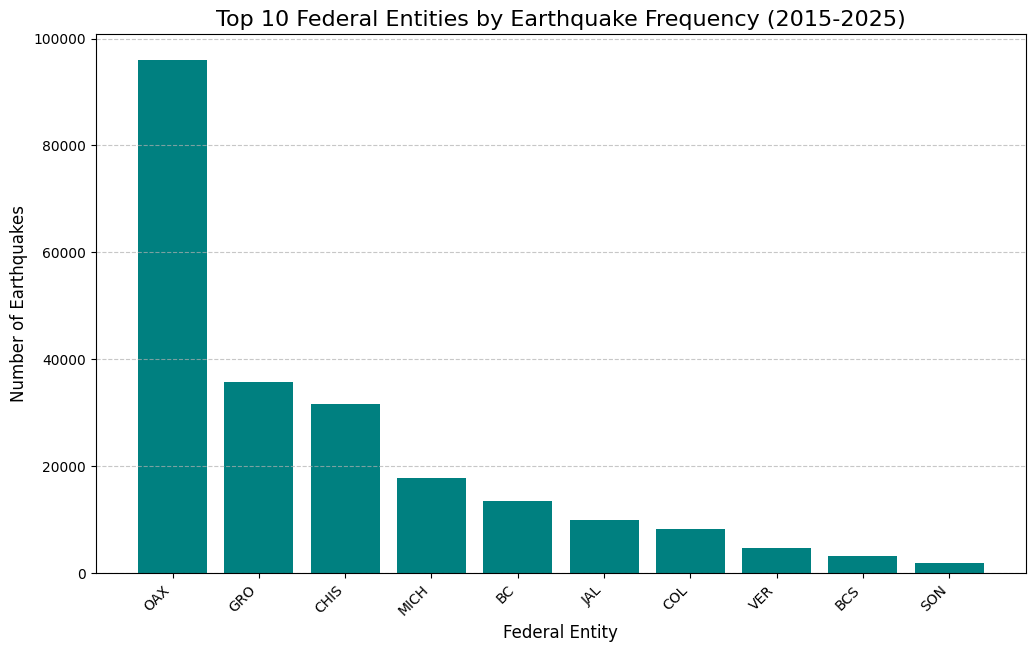

In [ ]:
plt.figure(figsize=(12, 7))

#Graphics
bars = plt.bar(top_10_entities.index, top_10_entities.values, color='teal')

plt.title('Top 10 Federal Entities by Earthquake Frequency (2015-2025)', fontsize=16)
plt.xlabel('Federal Entity', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)





In [ ]:
# Save image
image_file = 'top_10_entidades_sismos.png'
plt.savefig(image_file)
print(f"Graphic saved as: {image_file}")

Graphic saved as: top_10_entidades_sismos.png


<Figure size 640x480 with 0 Axes>

In [ ]:
output_file_path = "SSNMX_catalogo_procesado.csv"
df_clean.to_csv(output_file_path, index=False)
print(f"El DataFrame se ha guardado exitosamente como: {output_file_path}")

El DataFrame se ha guardado exitosamente como: SSNMX_catalogo_procesado.csv
